<a href="https://colab.research.google.com/github/nhanhd06/Book_Recommendation/blob/main/Data_Prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book-Crossing Recommendation System**

**Aim**: Build a recommendation engine using the Book-Crossing dataset, which includes book, user and ratings dataset

In [ ]:
! pip install kaggle

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle as pickle
from sklearn import model_selection

**Import the dataset from kaggle**

In [ ]:
file_share_link="https://drive.google.com/file/d/1M4yqyHPmR-EVXzyqeL1dVixkwuEhKpKD/view?usp=sharing"
file_id = file_share_link.split("/")
file_address = 'https://docs.google.com/uc?export=download&id=' + file_id[5]

In [ ]:
! rm -rf .kaggle && mkdir .kaggle
! rm -rf kaggle.json && wget -O kaggle.json "$file_address" 
! mv kaggle.json ~/.kaggle/ 
! chmod 600 /root/.kaggle/kaggle.json
! rm -rf books-dataset.zip && kaggle datasets download saurabhbagchi/books-dataset
! rm -rf books.csv ratings.csv users.csv && unzip  -j books-dataset.zip

--2021-12-04 02:50:20--  https://docs.google.com/uc?export=download&id=1M4yqyHPmR-EVXzyqeL1dVixkwuEhKpKD
Resolving docs.google.com (docs.google.com)... 142.250.157.139, 142.250.157.113, 142.250.157.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/440slmkkf5ovpr72qt1ho9r5nssiscan/1638586200000/15672033725657311753/*/1M4yqyHPmR-EVXzyqeL1dVixkwuEhKpKD?e=download [following]
--2021-12-04 02:50:21--  https://doc-0o-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/440slmkkf5ovpr72qt1ho9r5nssiscan/1638586200000/15672033725657311753/*/1M4yqyHPmR-EVXzyqeL1dVixkwuEhKpKD?e=download
Resolving doc-0o-5c-docs.googleusercontent.com (doc-0o-5c-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0o-5c-docs.googleusercontent.com (doc-0o-5

In [ ]:
books = pd.read_csv('books.csv', sep=';', error_bad_lines=False, encoding="latin-1" )
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1" )
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1" )

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

**Checking data output and shape**

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print('Books Data Summary: ', books.shape)
print('Users Data Summary: ', users.shape)
print('Ratings Data Summary: ', ratings.shape)

Books Data Summary:  (271360, 8)
Users Data Summary:  (278858, 3)
Ratings Data Summary:  (1149780, 3)


## **Preprocessing Users Data**

Check user data => Looks like location is combined with full address

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

***First, inspect User-ID Field***

Inspect to see if there is any duplicated User-ID => Looks like none

In [ ]:
unique_users = users['User-ID'].nunique()
all_users = users['User-ID'].count()
print("User-ID Unique Number: " + str(unique_users))
print("All User-ID Number: " + str(all_users))

User-ID Unique Number: 278858
All User-ID Number: 278858


***Next, inspect Location Field***

Break Location Field into City, State, and Country and display data

In [ ]:
# Split Location
data_expand = users['Location'].str.split(',', 2, expand=True)
data_expand.columns = ['City', 'State', 'Country']
users = users.join(data_expand)
users = users.drop(['Location'], axis=1)
users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


Check the top 10 cities with most amount of users => Looked like London is the most

In [ ]:
top_cities = users['City'].value_counts()[:10]
print("Top 10 Cities With Most Users:")
print(top_cities)

Top 10 Cities With Most Users:
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: City, dtype: int64


Check top 10 countries with most amount of users => It is interesting that City London has the most but USA is taking the lead in this field

In [ ]:
top_countries = users['Country'].value_counts()[:10]
print("Top 10 Countries With Most Users:")
print(top_countries)

Top 10 Countries With Most Users:
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: Country, dtype: int64


It looks like empty in Country Field has a lot = 4561 => Go ahead and replace its value with Nan instead

In [ ]:
users['Country'].replace('', np.nan, inplace=True)

***Next, inspect Age Field***

Check Age Column Values => Some of values are not correct like 244 which is too high for human age

In [ ]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

Check the entire age column => Looks like we did have the range above 100 years old a lot up to 244

In [ ]:
display(sorted(users['Age'].unique()))

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


It is best to adjust Users Dataset to be associated with 10 < Age < 100 only => Considered children - adults age

In [ ]:
users.loc[(users['Age']<10) | (users['Age']>100), 'Age'] = np.nan
users['Age'].describe()

count    166661.000000
mean         34.777122
std          13.610190
min          10.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

Making Histogram to show data distribution => Most customer are between 20 - 30

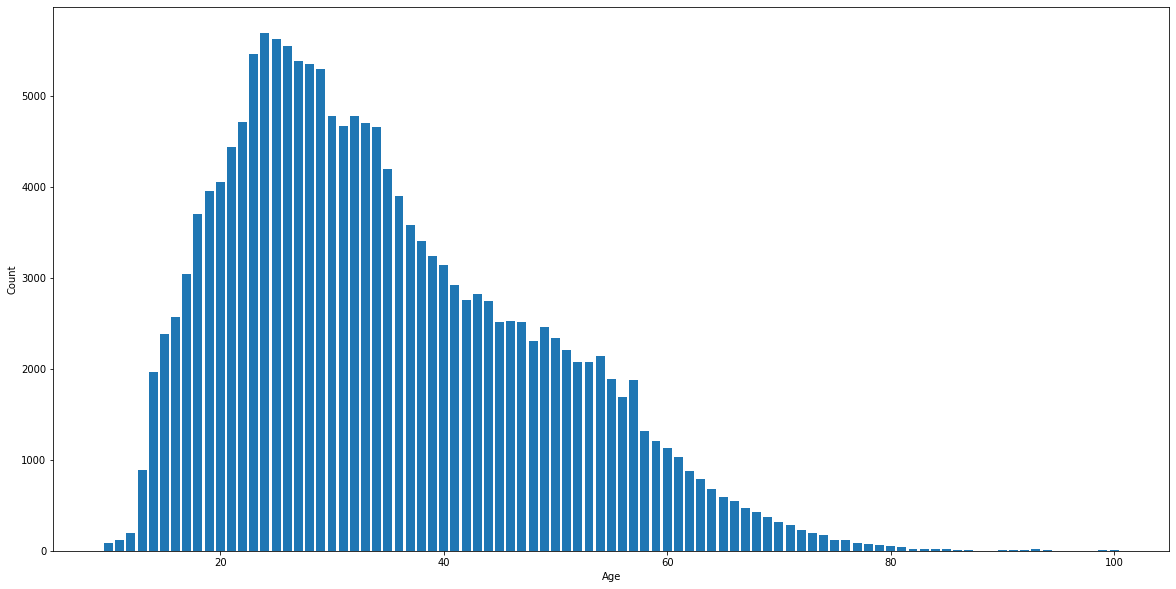

In [ ]:
data = users['Age'].value_counts()
plt.figure(figsize=(20, 10))
plt.bar(data.index, data.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Calculate how many null values in Age Column and calculate the percentage it takes the entire dataset => It is a lot with 67 % => Decided not to drop instead

In [ ]:
null_age_count = users['Age'].isnull().sum()
total_age_count = users['Age'].count()
total_percent = (null_age_count/total_age_count) * 100
total_percent
print(f'Total percent of null value in Users Data: {total_percent:.2f}%')

Total percent of null value in Users Data: 67.32%


## **Preprocessing Books Data**

In [ ]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

***First, inspect ISBN Field***

Check for duplicated values => Looks like there is none

In [ ]:
unique_ISBN = books.ISBN.nunique()
all_ISBN = books.ISBN.count()
print("ISBN Unique Number: " + str(unique_ISBN))
print("All ISBN Number: " + str(all_ISBN))

ISBN Unique Number: 271360
All ISBN Number: 271360


***Next, inspect Book Title Field***

Check whether it has empty field or not => There is none

In [ ]:
empty_string_title = books[books['Book-Title'] == '']
empty_string_title.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Check to see if there is duplicated values in books or not => Looks like a lot

In [ ]:
top_book_titles = books['Book-Title'].value_counts()[:10]
print("Top Duplicated Book Title:")
print(top_book_titles)

Top Duplicated Book Title:
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Adventures of Huckleberry Finn    20
Dracula                           20
The Secret Garden                 20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: Book-Title, dtype: int64


Check out the book title with above least amount of duplicated values - Masquerade => As it turned out, this books has a lot of different version being published different year => Hence explained why there are many different ISBNs

In [ ]:
display(books[books['Book-Title']=='Masquerade'])

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6665,042516019X,Masquerade,Gayle Lynds,1997,Berkley Publishing Group,http://images.amazon.com/images/P/042516019X.0...,http://images.amazon.com/images/P/042516019X.0...,http://images.amazon.com/images/P/042516019X.0...
9973,0316171476,Masquerade,Janet Dailey,1991,"Little, Brown",http://images.amazon.com/images/P/0316171476.0...,http://images.amazon.com/images/P/0316171476.0...,http://images.amazon.com/images/P/0316171476.0...
32792,080523747X,Masquerade,Kit Williams,1984,Schocken Books,http://images.amazon.com/images/P/080523747X.0...,http://images.amazon.com/images/P/080523747X.0...,http://images.amazon.com/images/P/080523747X.0...
34258,0821728334,Masquerade,Lowell Cauffiel,1989,Zebra Books,http://images.amazon.com/images/P/0821728334.0...,http://images.amazon.com/images/P/0821728334.0...,http://images.amazon.com/images/P/0821728334.0...
43592,0897330137,Masquerade,Sarah Hobson,1982,Academy Chicago Publishers,http://images.amazon.com/images/P/0897330137.0...,http://images.amazon.com/images/P/0897330137.0...,http://images.amazon.com/images/P/0897330137.0...
47422,0425117405,Masquerade,Serena Richards,1989,Berkley Pub Group,http://images.amazon.com/images/P/0425117405.0...,http://images.amazon.com/images/P/0425117405.0...,http://images.amazon.com/images/P/0425117405.0...
51707,0345366204,Masquerade,William X. Kienzle,1991,Fawcett Books,http://images.amazon.com/images/P/0345366204.0...,http://images.amazon.com/images/P/0345366204.0...,http://images.amazon.com/images/P/0345366204.0...
53579,0786015047,Masquerade,Lowell Cauffiel,2001,Pinnacle Books (Mm),http://images.amazon.com/images/P/0786015047.0...,http://images.amazon.com/images/P/0786015047.0...,http://images.amazon.com/images/P/0786015047.0...
82989,0312969899,Masquerade,Walter Satterthwait,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312969899.0...,http://images.amazon.com/images/P/0312969899.0...,http://images.amazon.com/images/P/0312969899.0...
85620,0786004681,Masquerade,Lowell Cauffiel,1997,Pinnacle Books,http://images.amazon.com/images/P/0786004681.0...,http://images.amazon.com/images/P/0786004681.0...,http://images.amazon.com/images/P/0786004681.0...


It is best to keep those duplicated Book Title values since books would often have some changes in translation and appearance => Would definetely affect rating scale as well

***Next, inspect Book Author Field***

Check whether it has empty field or not => There is none

In [ ]:
empty_string_author = books[books['Book-Author'] == '']
empty_string_author.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Check the top 10 authors of books in this dataset

In [ ]:
top_book_authors = books['Book-Author'].value_counts()[:10]
print("Top 10 Authors with Most Entries:")
print(top_book_authors)

Top 10 Authors with Most Entries:
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Author, dtype: int64


***Next, inspect Year Of Publication Field***

Transform Year Of Publication from object to float type since the entire data contains only numbers

In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce', downcast='signed')

Check Year Of Publication Field => Looks like 0 is existed

In [ ]:
books['Year-Of-Publication'].describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

Replaced all rows of Year Of Publication with 0 with Nan since it is unknown and would not interference with any working algorithm


In [ ]:
books.loc[books['Year-Of-Publication'] == 0] = np.nan

Check Year Of Publication Field again

In [ ]:
books['Year-Of-Publication'].describe()

count    266739.000000
mean       1993.689772
std           8.325811
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

Not sure how there is a boook with publish date with future years as indicated above it goes on until 2050 but it looks like this data set is wrong => Alice in Wonderland = 2030

In [ ]:
future_books = books[books['Year-Of-Publication']>2021]
future_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030.0,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030.0,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030.0,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050.0,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050.0,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...


Based on the above result, the minimum is too slow as well = 1376 and it is better to sort out book that is published after 1900 instead

In [ ]:
old_books = books[books['Year-Of-Publication']<1900]
old_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
245607,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


Deleted those ISBN Books not below 1900 and not above 2021

In [ ]:
books = books.loc[~(books['ISBN'].isin(old_books['ISBN']))]
books = books.loc[~(books['ISBN'].isin(future_books['ISBN']))]
books['Year-Of-Publication'].describe()

count    266722.000000
mean       1993.693524
std           8.137847
min        1900.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

Draw the graph for Year Of Publication and it looks like mot book are between 1980 to 2005 

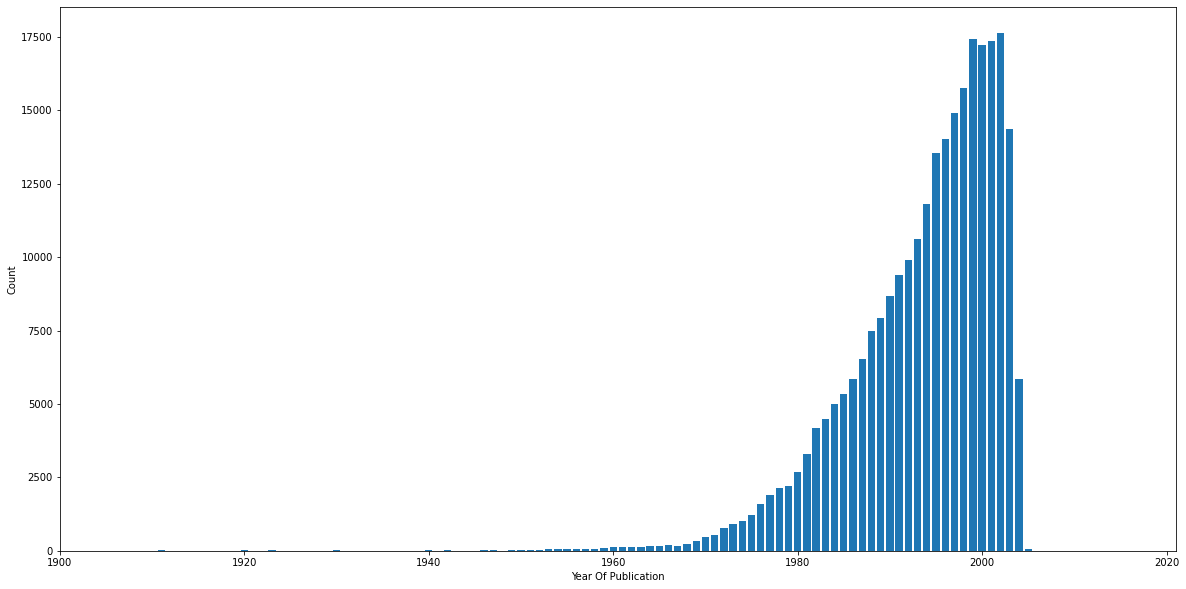

In [ ]:
data = books['Year-Of-Publication'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.bar(data.index, data.values)
plt.xlim([1900, 2021])
plt.xlabel('Year Of Publication')
plt.ylabel('Count')
plt.show()

***Next, inspect Publisher Field***

Check whether it has empty field or not => There is none

In [ ]:
empty_publishers = books[books['Publisher'] == '']
empty_publishers.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
top_publishers = books.Publisher.value_counts()[:10]
print("Top 10 Publishers with Most Entries:")
print(top_publishers)

Top 10 Publishers with Most Entries:
Harlequin                   7535
Silhouette                  4220
Pocket                      3870
Ballantine Books            3764
Bantam Books                3642
Scholastic                  3157
Simon &amp; Schuster        2965
Penguin Books               2843
Berkley Publishing Group    2767
Penguin USA                 2714
Name: Publisher, dtype: int64


***Next, inspect Image-URL-S, Image-URL-M, Image-URL-L***

It is better to drop these fields since there is no need

In [ ]:
books = books.drop(['Image-URL-S'], axis=1)
books = books.drop(['Image-URL-M'], axis=1)
books = books.drop(['Image-URL-L'], axis=1)

## **Preprocessing Ratings Data**

In [ ]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

***First, inspect User-ID Field***

Check if there is any null value => Looks like none

In [ ]:
empty_User_ID = ratings[ratings['User-ID'] == '']
empty_User_ID.head()

,User-ID,ISBN,Book-Rating


***Next, inspect ISBN Field***

Check 10 User ID with most ratings reviews on ISBN Field => Looks like user - 11676 has the huge ammount compared to the rest

In [ ]:
top_users = ratings.groupby('User-ID')['ISBN'].count().sort_values(ascending=False)
print("Top 10 Users with most ratings: ")
top_users[:10]

Top 10 Users with most ratings: 


User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: ISBN, dtype: int64

Check and see the distribution of ratings => Looks like there are a lot of zero values => Not reviewed and the rating review is supposed to start from 1 to 10 => Explained why the above users have a lot of amounts as well 

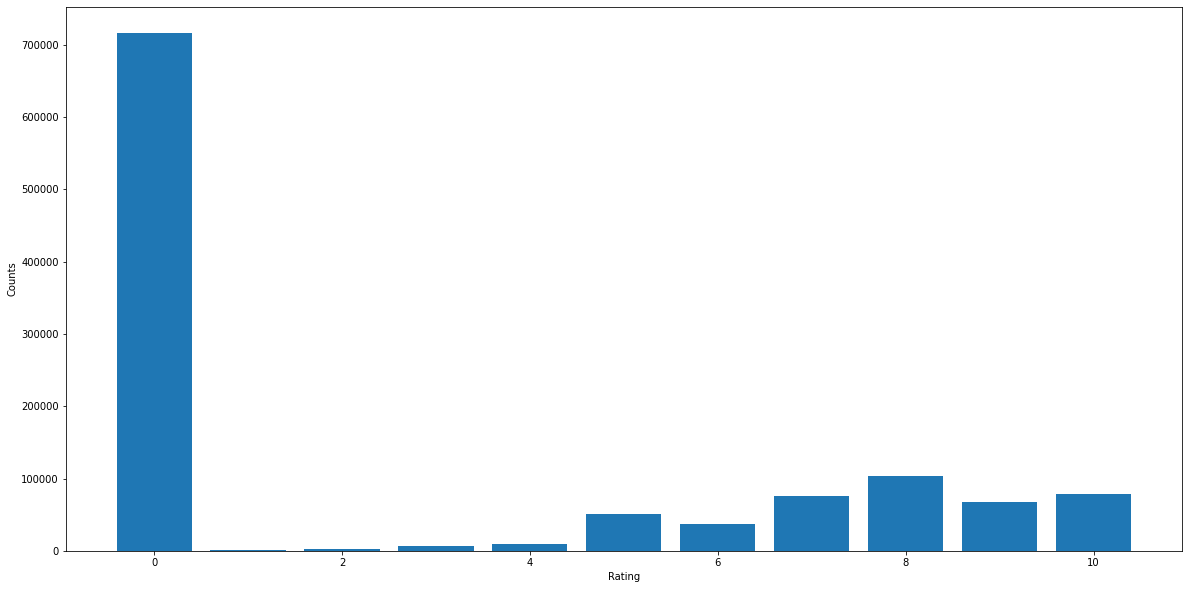

In [ ]:
rtg = ratings['Book-Rating'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

It is best to drop those zero values since it doesn't serve anything and takes a lot of space as well => Check again if zero is still existed or not on histogram

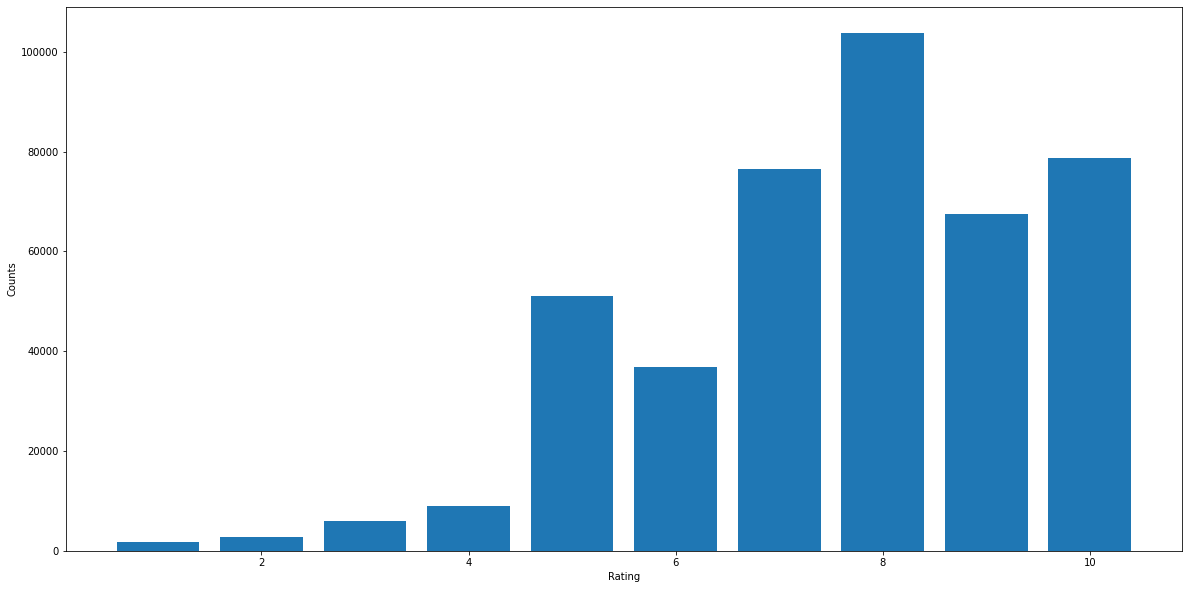

In [ ]:
ratings = ratings[ratings['Book-Rating'] != 0]
rtg = ratings['Book-Rating'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

***Next, inspect Book Rating Field***

Check Book Rating Column => Realize there is 0 - User has not rated the book yet 

In [ ]:
ratings['Book-Rating'].describe()

count    433671.000000
mean          7.601066
std           1.843798
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

Checked how many Book Rating data has 0 => More than half => It is better to drop those and only keep the ones with 1 to 10 rating scale

In [ ]:
with_0_ratings = ratings['Book-Rating'].count()
without_0_ratings = ratings[ratings['Book-Rating'] != 0]['Book-Rating'].count()
print("Total Count - Book Rating With Zero: ", with_0_ratings)
print("Total Count - Book Rating Without Zero: ", without_0_ratings)

Total Count - Book Rating With Zero:  433671
Total Count - Book Rating Without Zero:  433671


Graph Rating Data Set => It looks like most rating is above 5 - 10

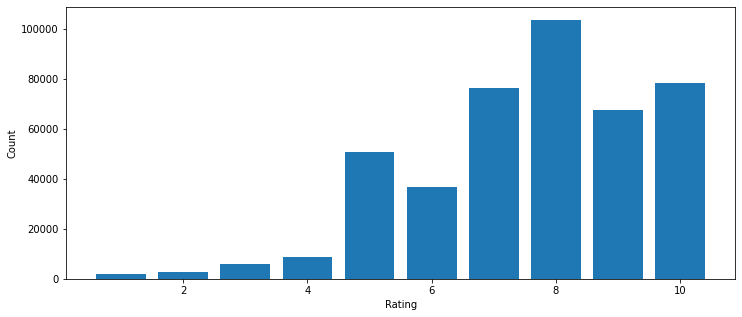

In [ ]:
ratings = ratings[ratings['Book-Rating'] != 0]
data = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(data.index, data.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## **Merge tables - Users, Books, and Ratings**

Check both books and ratings data size

In [ ]:
print(f'Books Dataset Size: {len(books)}')
print(f'Ratings Dataset Size: {len(ratings)}')

Books Dataset Size: 271343
Ratings Dataset Size: 433671


First, join the books dataset to the book_ratings dataset based the ISBN field

In [ ]:
books_with_ratings = ratings.join(books.set_index(['ISBN']), on=['ISBN'])
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


***Inspect Books With Ratings Field***

Check the size of Book With Ratings => Looks like the same as Ratings Dataset

In [ ]:
print(f'Book With Ratings Dataset Size: {len(books_with_ratings)}')

Book With Ratings Dataset Size: 433671


Since there are null values with a few ISBNs in the Ratings Dataset that did not match with the same field on Book Dataset => About 8 percent of current data => It is best to drop those fields and reduce data down as well 

In [ ]:
total_null_books = books_with_ratings['Book-Title'].isnull().sum()
total_difference = (len(books_with_ratings))/total_null_books
print("Total Null Values in Book With Ratings Data: %.2f%%" %total_difference)

Total Null Values in Book With Ratings Data: 7.79%


Drop those column and check again 

In [ ]:
books_with_ratings.dropna(subset=['Book-Title'], inplace=True)
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch


Looks like this dataset has been reduced in size now

In [ ]:
print(f'Book With Ratings Dataset Size: {len(books_with_ratings)}')

Book With Ratings Dataset Size: 378032


Check average highest ratings with a minimum number with more than 20 reviews => Looks right since Harry Potter and The Lord of the Rings should be in high ratings since they are very popular

In [ ]:
length = books_with_ratings['Book-Title'].value_counts()
mean_ratings = books_with_ratings[books_with_ratings['Book-Title'].isin(length[length>20].index)].groupby('Book-Title')['Book-Rating'].mean()
display(mean_ratings.sort_values(ascending=False)[:10])

Book-Title
Harry Potter and the Chamber of Secrets Postcard Book    9.869565
Calvin and Hobbes                                        9.583333
My Sister's Keeper : A Novel (Picoult, Jodi)             9.545455
The Giving Tree                                          9.423077
Where the Sidewalk Ends : Poems and Drawings             9.400000
84 Charing Cross Road                                    9.363636
Johnny Got His Gun                                       9.333333
The Two Towers (The Lord of the Rings, Part 2)           9.330882
Wolves of the Calla (The Dark Tower, Book 5)             9.272727
The Calvin and Hobbes Tenth Anniversary Book             9.260870
Name: Book-Rating, dtype: float64

Check least ratings with a minimum number with more than 20 reviews => Looked like the lowest rating = 4 and these are not very weird book title

In [ ]:
display(mean_ratings.sort_values(ascending=False)[-10:])

Book-Title
Filthy Rich                                5.960000
Mr. X                                      5.952381
The Klone and I: A High-Tech Love Story    5.666667
4 Blondes                                  5.653846
Killing Time                               5.517241
Naked Lunch                                5.458333
Isle of Dogs                               5.433962
Four Blondes                               5.393939
The Sexual Life of Catherine M.            4.913043
Wild Animus                                4.390706
Name: Book-Rating, dtype: float64

Check again top 10 book titles with most ISBN Numbers

In [ ]:
display(books_with_ratings.groupby('Book-Title')['ISBN'].nunique().sort_values(ascending=False)[:10])

Book-Title
Selected Poems                    16
The Secret Garden                 16
Dracula                           15
Adventures of Huckleberry Finn    15
Pride and Prejudice               14
Wuthering Heights                 14
Little Women                      13
Beloved                           13
The Hobbit                        12
Jane Eyre                         12
Name: ISBN, dtype: int64

Check how many book title with unique ISBN = 1 => Some books are still having 2 and above with mutiple ISBN after merged

It is best to keep those values as previously mentioned, better contents and revision would improve the book overall experience for sure

In [ ]:
isbn = books_with_ratings.groupby('Book-Title')['ISBN'].nunique()
isbn.value_counts()

1     123405
2       7733
3       1426
4        457
5        179
6         81
7         36
8         25
9          8
10         6
16         2
15         2
14         2
13         2
12         2
11         2
Name: ISBN, dtype: int64

In [ ]:
has_mult_isbn = isbn.where(isbn>1)
print("Book Title With Multiple ISBN Numbers: " + str(len(has_mult_isbn)))

Book Title With Multiple ISBN Numbers: 133368


Check the data size of Books With Ratings and Users Datasets

In [ ]:
print(f'Books With Ratings Dataset Size: {len(books_with_ratings)}')
print(f'Users Dataset Size: {len(users)}')

Books With Ratings Dataset Size: 378032
Users Dataset Size: 278858


Join the newly created Book With Ratings Dataset with Users Dataset with the User-ID field

In [ ]:
books_with_ratings_users = books_with_ratings.join(users.set_index('User-ID'), on='User-ID')
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch


Check each data column data and its shape

In [ ]:
books_with_ratings_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378032 entries, 1 to 1149778
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              378032 non-null  int64  
 1   ISBN                 378032 non-null  object 
 2   Book-Rating          378032 non-null  int64  
 3   Book-Title           378032 non-null  object 
 4   Book-Author          378031 non-null  object 
 5   Year-Of-Publication  378031 non-null  float64
 6   Publisher            378030 non-null  object 
 7   Age                  263149 non-null  float64
 8   City                 378032 non-null  object 
 9   State                378032 non-null  object 
 10  Country              367682 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 34.6+ MB


In [ ]:
books_with_ratings_users.shape

(378032, 11)

Outpt and save the progress to local directory

In [ ]:
books_with_ratings_users.to_csv('cleaned_data.csv')

## **Building a recommender system using collaborative filtering**

In [ ]:
user_item_rating = books_with_ratings[['User-ID', 'ISBN', 'Book-Rating']]
user_item_rating.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [ ]:
print(f'Train Data Size: {len(train_data)}')
print(f'Test Data Size: {len(test_data)}')

Train Data Size: 302425
Test Data Size: 75607
